In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [60]:
roi = pd.read_csv("ROI data.csv",index_col=0)

In [61]:
roi.describe()

,year,"Inflation, CP percent","Inflation, GDP deflator percent",Real IR percent,Unemployment percent
count,51.000000,51.000000,51.000000,51.000000,51.00000
mean,1995.000000,3.943745,3.439554,3.878221,6.24000
std,14.866069,2.895298,2.376838,2.384936,1.57845
min,1970.000000,-0.355550,0.762350,-1.281420,3.67000
25%,1982.500000,2.159070,1.853465,2.118215,5.04000
50%,1995.000000,3.156840,2.400980,3.436010,5.80000
75%,2007.500000,4.563770,4.121550,6.116805,7.28500
max,2020.000000,13.549200,9.462140,8.594620,9.70000


In [62]:
roi.head()


,year,"Inflation, CP percent","Inflation, GDP deflator percent",Real IR percent,Unemployment percent
country,,,,,
United States,1970,5.83826,5.60217,2.18540,4.9
United States,1971,4.29277,5.06917,0.62260,5.9
United States,1972,3.27228,4.32275,0.88723,5.6
United States,1973,6.17776,5.47988,2.40974,4.9
United States,1974,11.05480,8.99869,1.65106,5.6


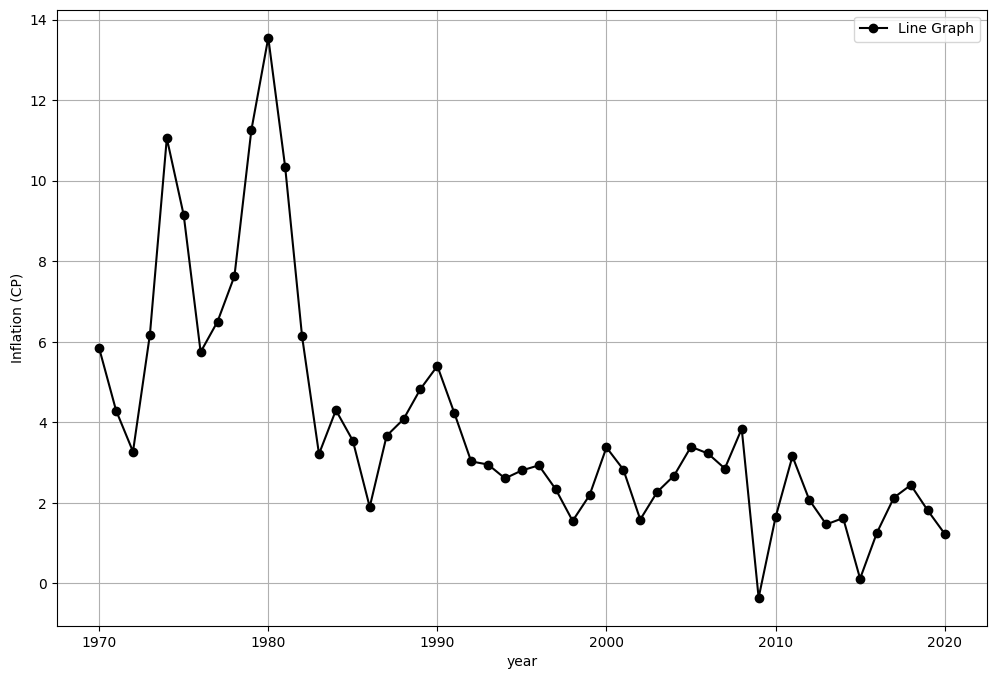

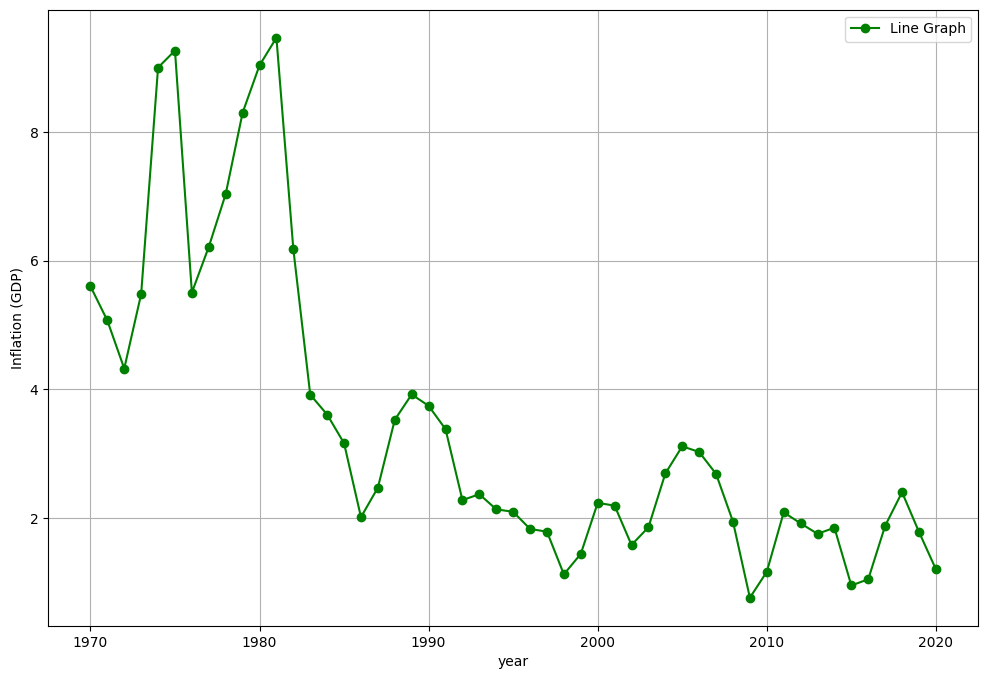

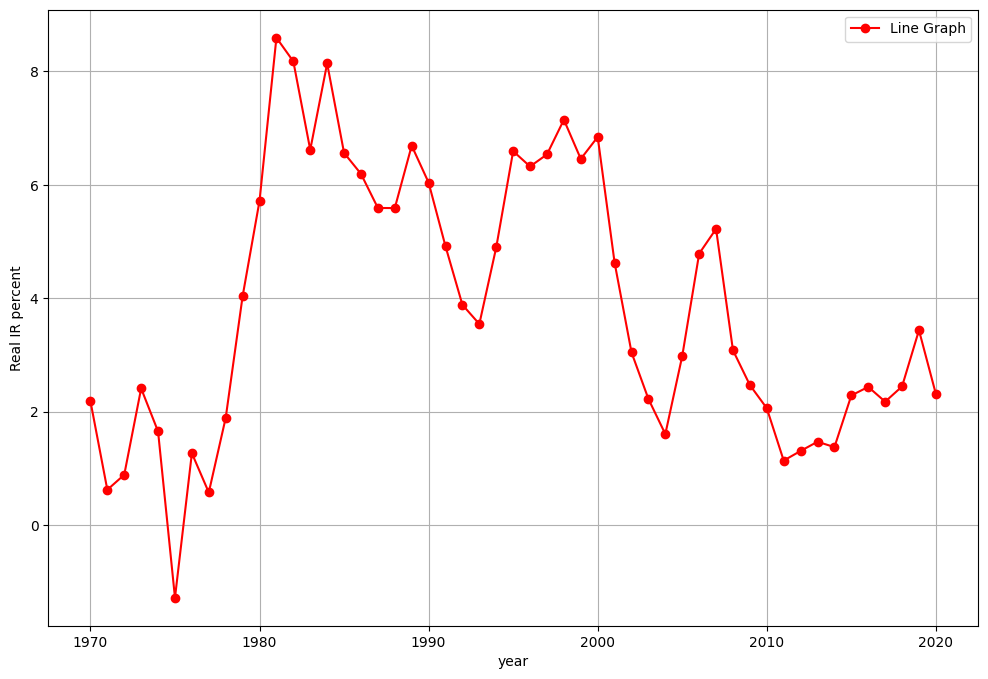

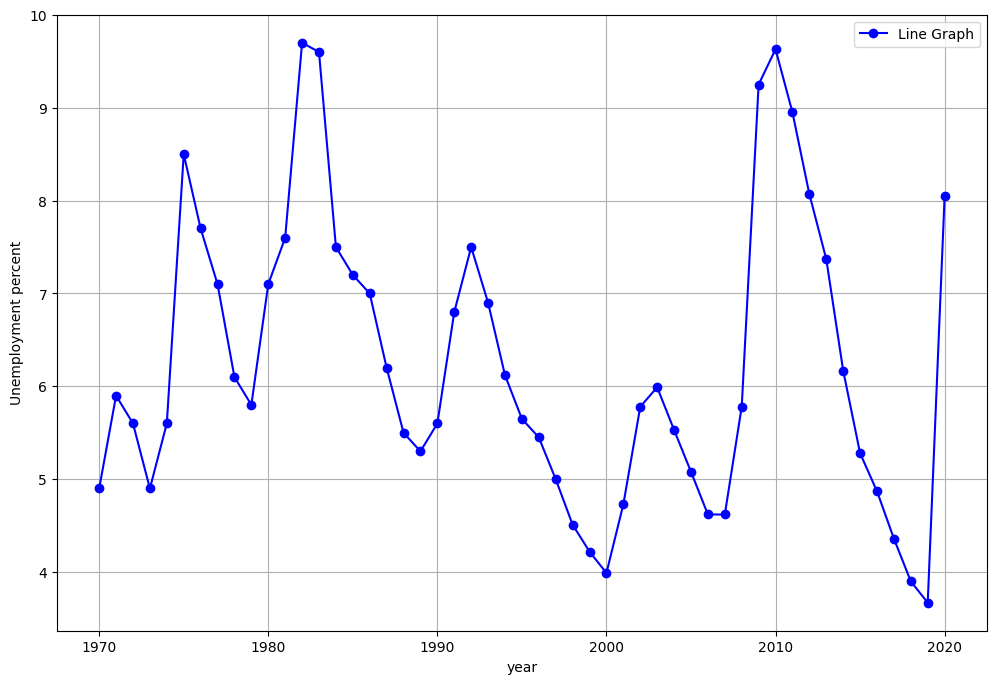

In [63]:
x_values = roi['year']
y_values = roi['Inflation, CP percent']
plt.figure(figsize = (12, 8))
plt.plot(x_values, y_values, label = 'Line Graph', marker = 'o', color = 'black')
plt.xlabel('year')
plt.ylabel('Inflation (CP)')
plt.legend()
plt.grid(True)
plt.show()

x_values = roi['year']
y_values = roi['Inflation, GDP deflator percent']
plt.figure(figsize = (12, 8))
plt.plot(x_values, y_values, label = 'Line Graph', marker = 'o', color = 'green')
plt.xlabel('year')
plt.ylabel('Inflation (GDP)')
plt.legend()
plt.grid(True)
plt.show()

x_values = roi['year']
y_values = roi['Real IR percent']
plt.figure(figsize = (12, 8))
plt.plot(x_values, y_values, label = 'Line Graph', marker = 'o', color = 'red')
plt.xlabel('year')
plt.ylabel('Real IR percent')
plt.legend()
plt.grid(True)
plt.show()

x_values = roi['year']
y_values = roi['Unemployment percent']
plt.figure(figsize = (12, 8))
plt.plot(x_values, y_values, label = 'Line Graph', marker = 'o', color = 'blue')
plt.xlabel('year')
plt.ylabel('Unemployment percent')
plt.legend()
plt.grid(True)
plt.show()

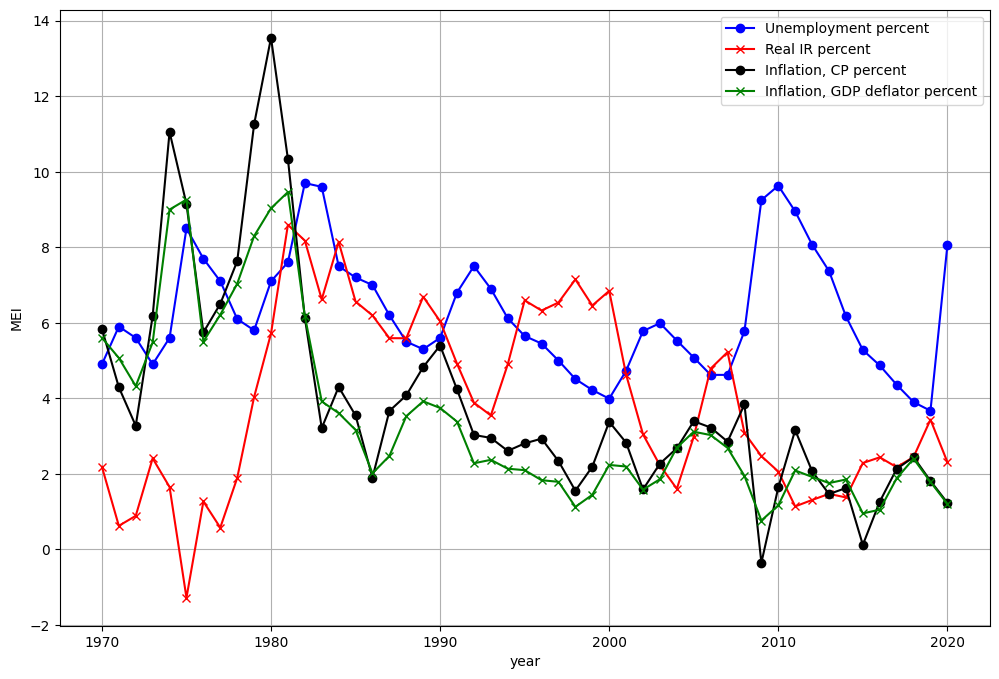

In [64]:
x_values = roi['year']
y1_values = roi['Unemployment percent']
y2_values =roi['Real IR percent']
y3_values =roi['Inflation, CP percent']
y4_values =roi['Inflation, GDP deflator percent']
plt.figure(figsize = (12, 8))
plt.plot(x_values, y1_values, label = 'Unemployment percent', marker = 'o', color = 'blue')
plt.plot(x_values, y2_values, label = 'Real IR percent', marker = 'x', color = 'red')
plt.plot(x_values, y3_values, label = 'Inflation, CP percent', marker = 'o', color = 'black')
plt.plot(x_values, y4_values, label = 'Inflation, GDP deflator percent', marker = 'x', color = 'green')
plt.xlabel('year')
plt.ylabel('MEI')
plt.legend()
plt.grid(True)
plt.show()

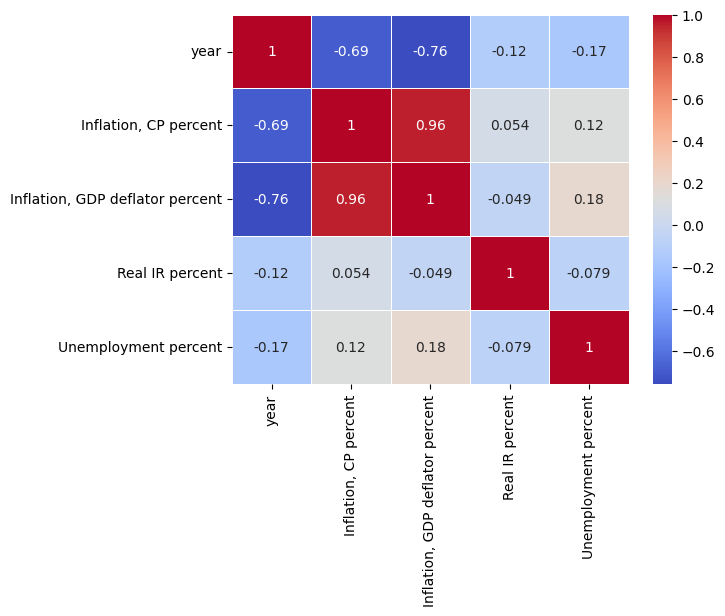

In [65]:
numerical_vars = roi.select_dtypes(include='number')
corr_matrix = numerical_vars.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [66]:
print(roi.isnull().sum())

year                               0
Inflation, CP percent              0
Inflation, GDP deflator percent    0
Real IR percent                    0
Unemployment percent               0
dtype: int64


In [67]:
scaled_features=roi.copy()
col_names=['year','Inflation, CP percent','Inflation, GDP deflator percent','Real IR percent','Unemployment percent']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names]=features
print(scaled_features)

                   year  Inflation, CP percent  \
country                                          
United States -1.698416               0.660853   
United States -1.630479               0.121749   
United States -1.562542              -0.234223   
United States -1.494606               0.779279   
United States -1.426669               2.480509   
United States -1.358732               1.813679   
United States -1.290796               0.628255   
United States -1.222859               0.892270   
United States -1.154923               1.286190   
United States -1.086986               2.550159   
United States -1.019049               3.350617   
United States -0.951113               2.229328   
United States -0.883176               0.763118   
United States -0.815239              -0.255097   
United States -0.747303               0.124459   
United States -0.679366              -0.138869   
United States -0.611430              -0.713588   
United States -0.543493              -0.097386   


In [68]:
scaled_features.describe()

,year,"Inflation, CP percent","Inflation, GDP deflator percent",Real IR percent,Unemployment percent
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,-8.707632e-18,2.372830e-16,-9.796086e-17,-8.054559e-17,-1.219068e-16
std,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00
min,-1.698416e+00,-1.499699e+00,-1.137580e+00,-2.184957e+00,-1.644381e+00
25%,-8.492078e-01,-6.225380e-01,-6.739505e-01,-7.453110e-01,-7.678043e-01
50%,0.000000e+00,-2.744915e-01,-4.413041e-01,-1.872634e-01,-2.815282e-01
75%,8.492078e-01,2.162799e-01,2.897892e-01,9.479748e-01,6.686296e-01
max,1.698416e+00,3.350617e+00,2.559078e+00,1.997257e+00,2.213836e+00


MODELLING OF DATA

In [69]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [70]:
imputer = SimpleImputer(strategy='mean')
roi[['Inflation, CP percent', 'Inflation, GDP deflator percent', 'Unemployment percent']] = imputer.fit_transform(roi[['Inflation, CP percent', 'Inflation, GDP deflator percent', 'Unemployment percent']])

In [71]:
scaler = StandardScaler()
roi[['Inflation, CP percent', 'Inflation, GDP deflator percent', 'Unemployment percent']] = scaler.fit_transform(roi[['Inflation, CP percent', 'Inflation, GDP deflator percent','Unemployment percent']])

In [72]:
roi['Real IR percent'].fillna(roi['Real IR percent'].median(), inplace = True)

In [73]:
X = roi[['Inflation, CP percent', 'Inflation, GDP deflator percent', 'Unemployment percent']]
y = roi['Real IR percent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
print("\nProcessed Dataset:")
print(X_train.head())
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Processed Dataset:
               Inflation, CP percent  Inflation, GDP deflator percent  \
country                                                                 
United States               1.286190                         1.527256   
United States              -0.743531                        -0.702978   
United States               0.628255                         0.876952   
United States              -0.632640                        -0.662646   
United States               2.480509                         2.362151   

               Unemployment percent  
country                              
United States             -0.089577  
United States             -1.644381  
United States              0.934162  
United States             -1.202893  
United States             -0.409496  
Shape of X_train: (40, 3)
Shape of X_test: (11, 3)


TRAINING LSTM RNN MODEL

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [76]:
features = roi[['Inflation, CP percent', 'Inflation, GDP deflator percent', 'Unemployment percent']].values
target = roi['Real IR percent'].values


In [77]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [78]:
sequence_length = 10
X, y = [], []
for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i:i+sequence_length])
    y.append(target[i+sequence_length])

X, y = np.array(X), np.array(y)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, features.shape[1])))
model.add(Dense(1))

In [81]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [82]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 26.6804 - val_loss: 21.2527
Epoch 2/50
1/1 [==============================] - 0s 45ms/step - loss: 26.4971 - val_loss: 21.1000
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 26.3173 - val_loss: 20.9499
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 26.1403 - val_loss: 20.8010
Epoch 5/50
1/1 [==============================] - 0s 41ms/step - loss: 25.9657 - val_loss: 20.6539
Epoch 6/50
1/1 [==============================] - 0s 45ms/step - loss: 25.7931 - val_loss: 20.5078
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 25.6222 - val_loss: 20.3617
Epoch 8/50
1/1 [==============================] - 0s 29ms/step - loss: 25.4511 - val_loss: 20.2146
Epoch 9/50
1/1 [==============================] - 0s 30ms/step - loss: 25.2784 - val_loss: 20.0656
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 25.1030 - val_loss: 19.9130
Epoch 11/50

In [83]:
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Data: {loss}")

1/1 [==============================] - 0s 18ms/step - loss: 3.5886
Mean Squared Error on Test Data: 3.5885729789733887


In [84]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 115ms/step


In [85]:
import matplotlib.pyplot as plt

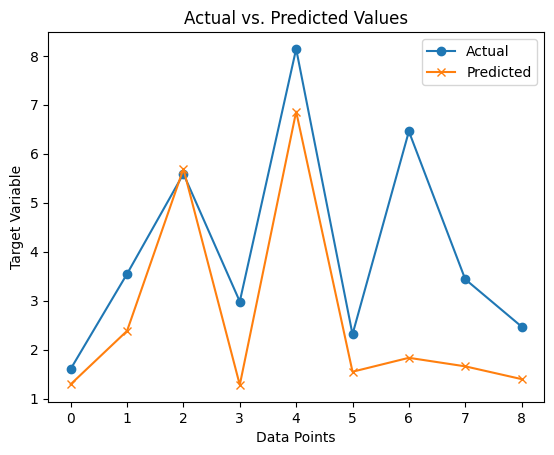

In [86]:
plt.plot(y_test, label='Actual', marker='o')
plt.plot(predictions, label='Predicted', marker='x')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [87]:
mse = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')




Mean Squared Error: 3.59


TRAIN AN RANDOM FOREST MODEL

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.normal(0, 1, 100)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')




Mean Squared Error: 0.73
R-squared: 0.98


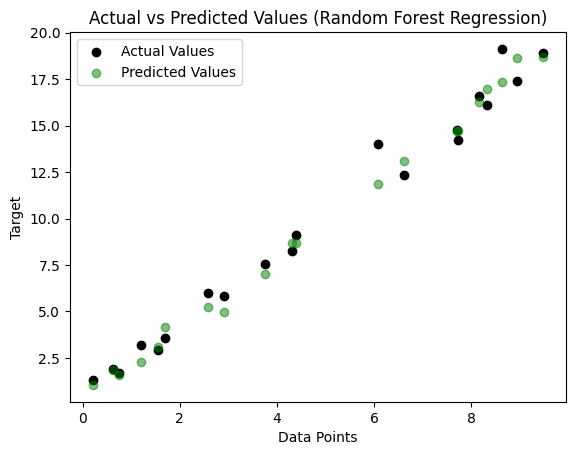

In [92]:
# Plot actual vs predicted values
plt.scatter(X_test, y_test, label='Actual Values', color='black')
plt.scatter(X_test, predictions, label='Predicted Values', color='green', alpha=0.5)
plt.xlabel('Data Points')
plt.ylabel('Target')
plt.title('Actual vs Predicted Values (Random Forest Regression)')
plt.legend()
plt.show()

SVM

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [94]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [96]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)


In [97]:
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [98]:
predictions = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.95


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



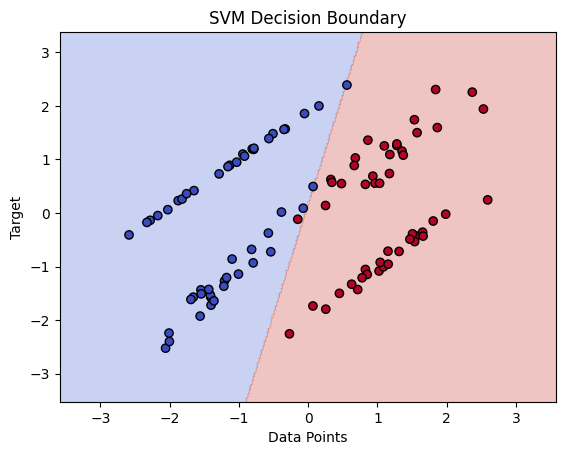

In [99]:
print(classification_report(y_test, predictions))
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary')
plt.xlabel('Data Points')
plt.ylabel('Target')
plt.show()

KNN


In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [101]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
predictions = knn_model.predict(X_test_scaled)


In [104]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.95


In [105]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



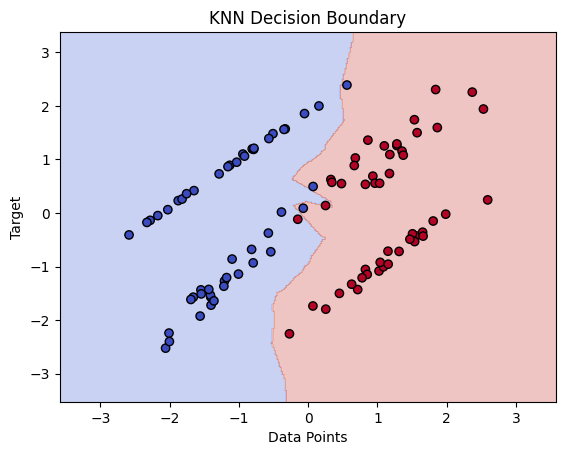

In [106]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('KNN Decision Boundary')
plt.xlabel('Data Points')
plt.ylabel('Target')
plt.show()

CHECKING BEST MODEL

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np



In [108]:
X = roi.drop('Real IR percent', axis=1)
y = roi['Real IR percent']


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)


In [111]:
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)


In [112]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)


In [113]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=50, batch_size=32, verbose=2)
lstm_predictions = model.predict(X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1)))
lstm_mse = mean_squared_error(y_test, lstm_predictions)



Epoch 1/50
2/2 - 1s - loss: 21.4450 - 1s/epoch - 646ms/step
Epoch 2/50
2/2 - 0s - loss: 20.5588 - 10ms/epoch - 5ms/step
Epoch 3/50
2/2 - 0s - loss: 19.7229 - 7ms/epoch - 4ms/step
Epoch 4/50
2/2 - 0s - loss: 18.9355 - 8ms/epoch - 4ms/step
Epoch 5/50
2/2 - 0s - loss: 18.1302 - 8ms/epoch - 4ms/step
Epoch 6/50
2/2 - 0s - loss: 17.3357 - 8ms/epoch - 4ms/step
Epoch 7/50
2/2 - 0s - loss: 16.4728 - 7ms/epoch - 4ms/step
Epoch 8/50
2/2 - 0s - loss: 15.7027 - 8ms/epoch - 4ms/step
Epoch 9/50
2/2 - 0s - loss: 14.8603 - 8ms/epoch - 4ms/step
Epoch 10/50
2/2 - 0s - loss: 14.0208 - 8ms/epoch - 4ms/step
Epoch 11/50
2/2 - 0s - loss: 13.2049 - 8ms/epoch - 4ms/step
Epoch 12/50
2/2 - 0s - loss: 12.4524 - 9ms/epoch - 4ms/step
Epoch 13/50
2/2 - 0s - loss: 11.7207 - 9ms/epoch - 4ms/step
Epoch 14/50
2/2 - 0s - loss: 10.8795 - 9ms/epoch - 4ms/step
Epoch 15/50
2/2 - 0s - loss: 10.0453 - 9ms/epoch - 4ms/step
Epoch 16/50
2/2 - 0s - loss: 9.1121 - 8ms/epoch - 4ms/step
Epoch 17/50
2/2 - 0s - loss: 8.3216 - 8ms/epoch 

In [114]:
mse_values = {
    'Random Forest': rf_mse,
    'SVM': svm_mse,
    'KNN': knn_mse,
    'LSTM': lstm_mse
}
print(mse_values)

{'Random Forest': 0.4356164047458618, 'SVM': 5.8521724704085045, 'KNN': 0.652275023344727, 'LSTM': 5.551197305754597}


In [115]:
best_model = min(mse_values, key=mse_values.get)
print(f'Best Model: {best_model} with MSE: {mse_values[best_model]}')

Best Model: Random Forest with MSE: 0.4356164047458618
